# An example of unsupervised learning - using K-Means clustering and Gaussian Mixture

In [63]:
# Dataset used - http://ggobi.org/book/data/olive.csv
# The data contains the percentage of fatty acid in composition of Olive Oil 
# and is used to check the authenticity of the olive oil.
#

# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Read the CSV file and load the data

oliveData = pd.read_csv("olive.csv")
print("Raw Header :\n" , oliveData.columns , "\n")
print("\n\nDescription of the data : \n")
oliveData.describe()

Raw Header :
 Index(['region', 'area', 'palmitic', 'palmitoleic', 'stearic', 'oleic',
       'linoleic', 'linolenic', 'arachidic', 'eicosenoic'],
      dtype='object') 



Description of the data : 



,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,1.699301,4.599650,1231.741259,126.094406,228.865385,7311.748252,980.527972,31.888112,58.097902,16.281469
std,0.859968,2.356687,168.592264,52.494365,36.744935,405.810222,242.799221,12.968697,22.030250,14.083295
min,1.000000,1.000000,610.000000,15.000000,152.000000,6300.000000,448.000000,0.000000,0.000000,1.000000
25%,1.000000,3.000000,1095.000000,87.750000,205.000000,7000.000000,770.750000,26.000000,50.000000,2.000000
50%,1.000000,3.000000,1201.000000,110.000000,223.000000,7302.500000,1030.000000,33.000000,61.000000,17.000000
75%,3.000000,7.000000,1360.000000,169.250000,249.000000,7680.000000,1180.750000,40.250000,70.000000,28.000000
max,3.000000,9.000000,1753.000000,280.000000,375.000000,8410.000000,1470.000000,74.000000,105.000000,58.000000


In [64]:
# We drop the unwanted column - Area and also the target column Region as it is not needed for unsupervised learning
# Then e prep the data. Standardize the data and then make the data 2 dimensional 
# using Principal Components Analysis. Then we create the Train and Test sets

features = ['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic','arachidic', 'eicosenoic']

# Separating out the features
x = oliveData.loc[:, features].values

# Extract the target
y = oliveData.loc[:,['region']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
x = pca.fit_transform(x)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance: ", explained_variance , "\n\n")

oliveDF = pd.DataFrame(data = x , columns = ['pc1', 'pc2'])
print(oliveDF.head())

X_Train, X_Test = train_test_split( oliveDF, test_size=0.20, random_state=45)
print("\n\nTrain size :",len(X_Train),"\nTest Size :",len(X_Test))

Explained Variance:  [0.46517625 0.22072469] 


        pc1       pc2
0  1.576741  1.493914
1  1.323847  1.073212
2  2.851595  1.894557
3  1.747849  3.024521
4  0.915511  3.298495


Train size : 457 
Test Size : 115


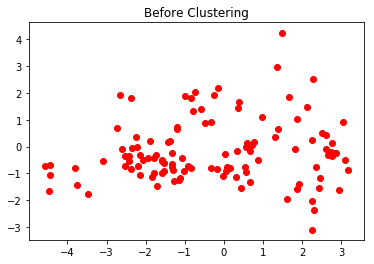

In [62]:
plt.scatter(X_Test.iloc[:,0],X_Test.iloc[:,1],c='red')
plt.title('Before Clustering')
plt.show()

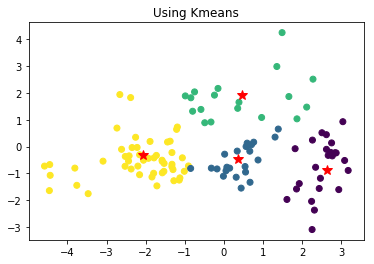

In [57]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_Train)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X_Test)
plt.scatter(X_Test.iloc[:,0],X_Test.iloc[:,1],c=labels)
for idx, centroid in enumerate(centroids):
    plt.plot(centroid[0], centroid[1], color='red', marker='*', ms=10)
plt.title('Using Kmeans')
plt.show()

Converged: True


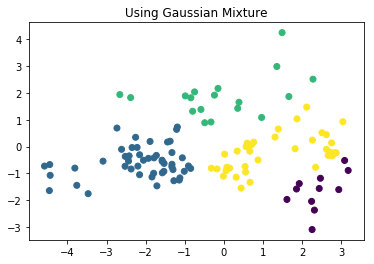

In [59]:
#Gaussian Mixture
GMM = GaussianMixture(n_components=4).fit(X_Train)
labels = GMM.predict(X_Test)
converged = GMM.converged_
print('Converged:', converged) # To validate if the data has converged
plt.scatter(X_Test.iloc[:,0],X_Test.iloc[:,1],c=labels)
plt.title('Using Gaussian Mixture')
plt.show()

As can be seen above both KMeans and GaussianMixture algorithm result into 4 clusters as expected